In [2]:
import sys
import datacube
import numpy as np
import seaborn as sns
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datacube.utils import geometry
from datacube.utils.geometry import CRS
from datacube.helpers import write_geotiff
import os

# Import external functions from dea-notebooks using relative link to Scripts
sys.path.append('../10_Scripts')

import DEADataHandling
import DEAPlotting

# Connect to datacube database
dc = datacube.Datacube(app='Snow monitoring with Landsat')

In [5]:
Snow_sum2016_2018=pd.read_csv('results/Vic/1800/2016_2018__frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum2014_2015=pd.read_csv('results/Vic/1800/2014_2015__frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
# Snow_sum2012_2013=pd.read_csv('results/threshold_02/2012_2013_new2_frequency_prop.csv', 
#             usecols=[1, 2, 3, 4], index_col=0
#            )
# Snow_sum2010_2011=pd.read_csv('results/threshold_02/2010_2011_new2_frequency_prop.csv', 
#             usecols=[1, 2, 3, 4], index_col=0
#            )


Snow_sum2010_2018=pd.concat([
#     Snow_sum2010_2011,
#                              Snow_sum2012_2013,
                             Snow_sum2014_2015,Snow_sum2016_2018])

In [6]:
Snow_sum2010_2018.keys()

Index(['snow_prop_elev', 'pixel_prop', 'pixel_over_005'], dtype='object')

In [9]:
Snow_sum2010_2018.columns = ['snow_prop', 'pixel_prop', '1800_validpix_v_allpixels']

In [131]:
Snow_sum2008_2009=pd.read_csv('results/threshold_02/2008_2009_new2_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum2006_2007=pd.read_csv('results/threshold_02/2006_2007_new2_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
# Snow_sum2004_2005=pd.read_csv('results/threshold_02/2004_2005_new2_frequency_prop.csv', 
#             usecols=[1, 2, 3, 4], index_col=0
#            )
Snow_sum2002_2003=pd.read_csv('results/threshold_02/2002_2003_new2_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum2000_2001=pd.read_csv('results/threshold_02/2000_2001_new2_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )


Snow_sum2000_2009=pd.concat([Snow_sum2000_2001,Snow_sum2002_2003,
                             #Snow_sum2004_2005,
                             Snow_sum2006_2007,
                             Snow_sum2008_2009])
Snow_sum2000_2009.columns = ['snow_prop', 'pixel_prop', '1200_validpix_v_allpixels']

In [132]:
Snow_sum1998_1999=pd.read_csv('results/threshold_02/1998_1999_new2_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum1996_1997=pd.read_csv('results/threshold_02/1996_1997_new2_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum1994_1995=pd.read_csv('results/threshold_02/1994_1995_new2_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum1992_1993=pd.read_csv('results/threshold_02/1992_1993_new2_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum1990_1991=pd.read_csv('results/threshold_02/1990_1991_new2_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )
Snow_sum1987_1989=pd.read_csv('results/threshold_02/1987_1989_new2_frequency_prop.csv', 
            usecols=[1, 2, 3, 4], index_col=0
           )


Snow_sum1990_1999=pd.concat([Snow_sum1990_1991,Snow_sum1992_1993,Snow_sum1994_1995, Snow_sum1996_1997, Snow_sum1998_1999])

Snow_sum1990_1999.columns = ['snow_prop', 'pixel_prop', '1200_validpix_v_allpixels']
Snow_sum1987_1989.columns = ['snow_prop', 'pixel_prop', '1200_validpix_v_allpixels']

In [53]:
# Snow_sum2010_2018['under_30%'] = np.where(Snow_sum2010_2018['1200_validpix_v_allpixels'] < 0.3, Snow_sum2010_2018['1200_validpix_v_allpixels'], np.nan)
# Snow_sum2010_2018['over_70%'] = np.where(Snow_sum2010_2018['1200_validpix_v_allpixels'] > 0.7, Snow_sum2010_2018['1200_validpix_v_allpixels'], np.nan)
# Snow_sum2000_2009['under_30%'] = np.where(Snow_sum2000_2009['1200_validpix_v_allpixels'] < 0.3, Snow_sum2000_2009['1200_validpix_v_allpixels'], np.nan)
# Snow_sum2000_2009['over_70%'] = np.where(Snow_sum2000_2009['1200_validpix_v_allpixels'] > 0.7, Snow_sum2000_2009['1200_validpix_v_allpixels'], np.nan)
# Snow_sum1990_1999['under_30%'] = np.where(Snow_sum1990_1999['1200_validpix_v_allpixels'] < 0.3, Snow_sum1990_1999['1200_validpix_v_allpixels'], np.nan)
# Snow_sum1990_1999['over_70%'] = np.where(Snow_sum1990_1999['1200_validpix_v_allpixels'] > 0.7, Snow_sum1990_1999['1200_validpix_v_allpixels'], np.nan)
# Snow_sum1987_1989['under_30%'] = np.where(Snow_sum1987_1989['1200_validpix_v_allpixels'] < 0.3, Snow_sum1987_1989['1200_validpix_v_allpixels'], np.nan)
# Snow_sum1987_1989['over_70%'] = np.where(Snow_sum1987_1989['1200_validpix_v_allpixels'] > 0.7, Snow_sum1987_1989['1200_validpix_v_allpixels'], np.nan)

In [133]:
Snow_sum2010_2018.keys()

Index(['snow_prop', 'pixel_prop', '1200_validpix_v_allpixels'], dtype='object')

In [10]:
Snow_sum2010_2018['snow_over_005'] = np.where(Snow_sum2010_2018['snow_prop'] > 0.05, Snow_sum2010_2018['snow_prop'], np.nan)

In [62]:
#Snow_sum2010_2018

In [12]:
dfs = [(Snow_sum2010_2018, 2010), 
#        (Snow_sum2000_2009, 2000), (Snow_sum1990_1999, 1990),(Snow_sum1987_1989, 1980)
      ]

In [14]:
for i, j in dfs:
    i['30_70'] = np.where(i['snow_prop'] > 0.05, i['snow_prop'], np.nan)
    i['under_30%'] = np.where(i['1800_validpix_v_allpixels'] < 0.3, i['snow_prop'], np.nan)
    i['over_70%'] = np.where(i['1800_validpix_v_allpixels'] > 0.7, i['snow_prop'], np.nan)
#     i['50_70%'] = np.where(i['1800_validpix_v_allpixels'] < 0.7, i['snow_prop'], np.nan)
#     i['50_70%'] = np.where(i['1800_validpix_v_allpixels'] < 0.5, np.nan, i['50_70%'])
#     i['30_50%'] = np.where(i['1800_validpix_v_allpixels'] < 0.5, i['snow_prop'], np.nan)
#     i['30_50%'] = np.where(i['1800_validpix_v_allpixels'] < 0.3, np.nan, i['30_50%'])


In [152]:
# Snow_sum2010_2018[200:300]

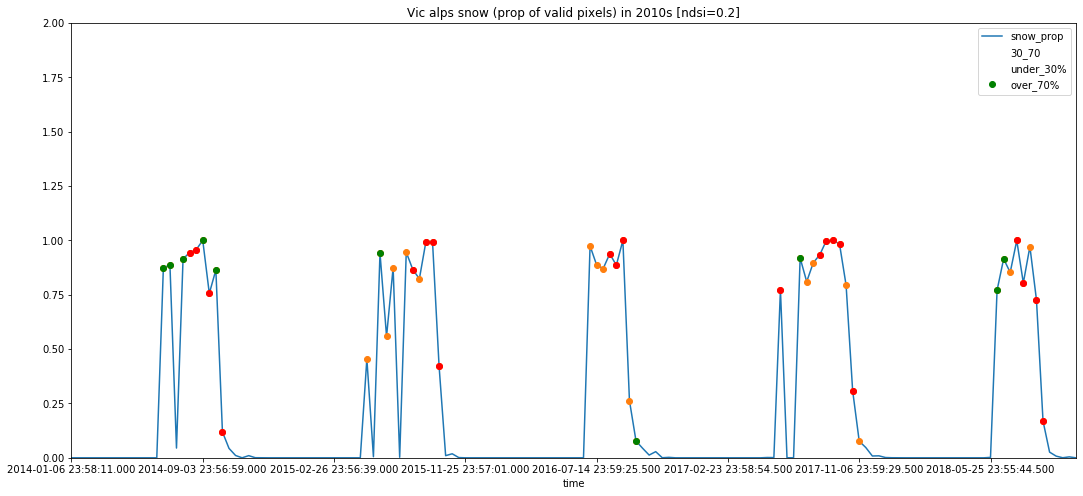

In [21]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("snow_frequency_NSW.pdf")
year = [2010, 2000, 1990, 1980]
for i,j in dfs:
    fig, ax = plt.subplots(figsize=(18,8)) 
    b = i.plot(y='snow_prop', ylim=(0,1),ax=ax, title='Vic alps snow (prop of valid pixels) in '+str(j)+'s [ndsi=0.2]')
    
    b = i.plot(y='30_70', style='o', ax=ax)
    b = i.plot(y='under_30%',style='ro', ax=ax)
#     b = i.plot(y='30_50%',style='o', ax=ax)
#     b = i.plot(y='50_70%',style='bo', ax=ax)
    b = i.plot(y='over_70%', style='go', ax=ax)
    plt.ylim(0, 2)
    pdf.savefig()
pdf.close()

In [63]:
Snow_sum2010_2018['snow_under_30'] = np.where(Snow_sum2010_2018['1200_validpix_v_allpixels'] < 0.3, Snow_sum2010_2018['snow_prop'], np.nan)

In [65]:
Snow_sum2010_2018['snow_over70%'] = np.where(Snow_sum2010_2018['1200_validpix_v_allpixels'] > 0.7, Snow_sum2010_2018['snow_prop'], np.nan)

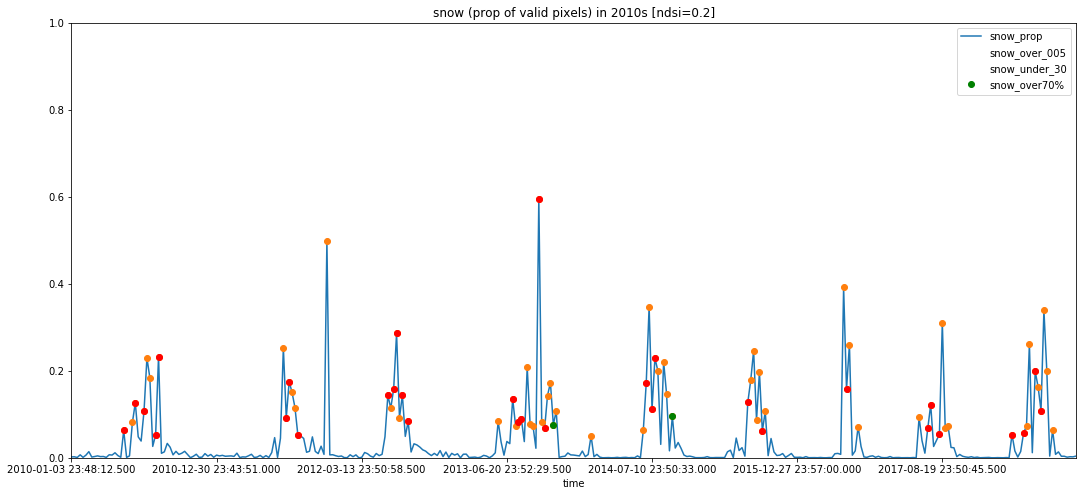

In [66]:
dfs = [Snow_sum2010_2018, Snow_sum2000_2009, Snow_sum1990_1999,Snow_sum1987_1989]
fig, ax = plt.subplots(figsize=(18,8)) 
b = Snow_sum2010_2018.plot(y='snow_prop', ylim=(0,1),ax=ax, title='snow (prop of valid pixels) in 2010s [ndsi=0.2]')
b = Snow_sum2010_2018.plot(y='snow_over_005',
                            style='o',
#                            #kind='bar', color='lightgreen',
                            ax=ax)
b = Snow_sum2010_2018.plot(y='snow_under_30',
                           style='ro',
                           #kind='bar', color='lightgreen',
                           ax=ax)
b = Snow_sum2010_2018.plot(y='snow_over70%',
                           style='go',
                           #kind='bar', color='lightgreen',
                           ax=ax)

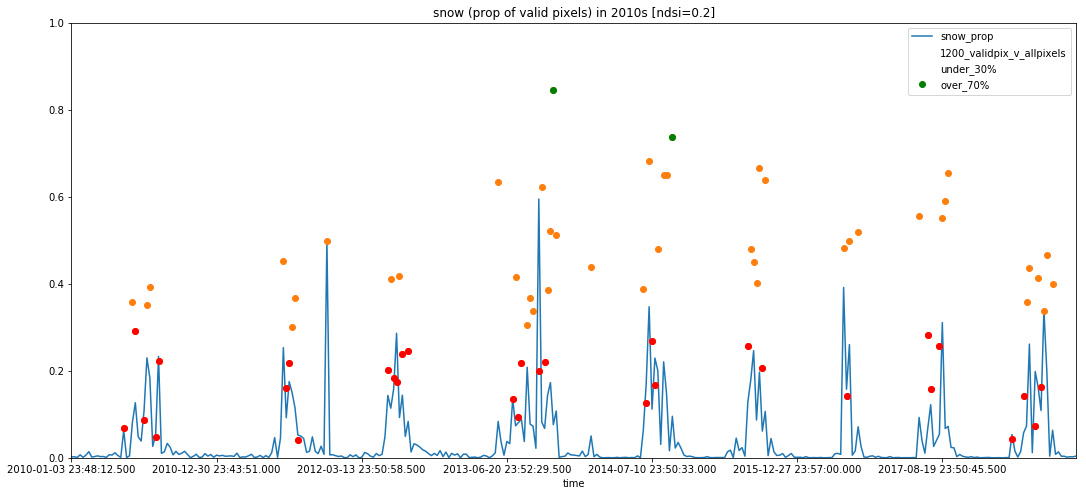

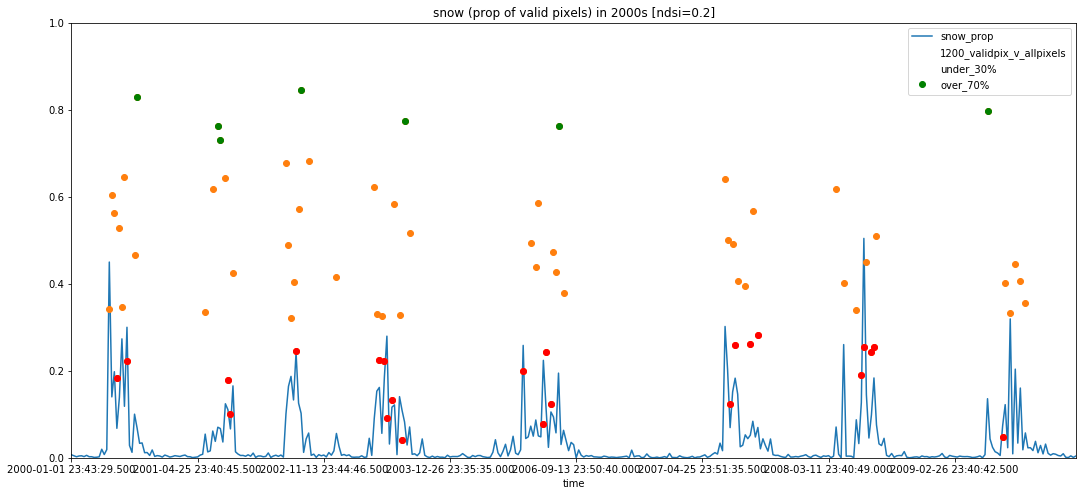

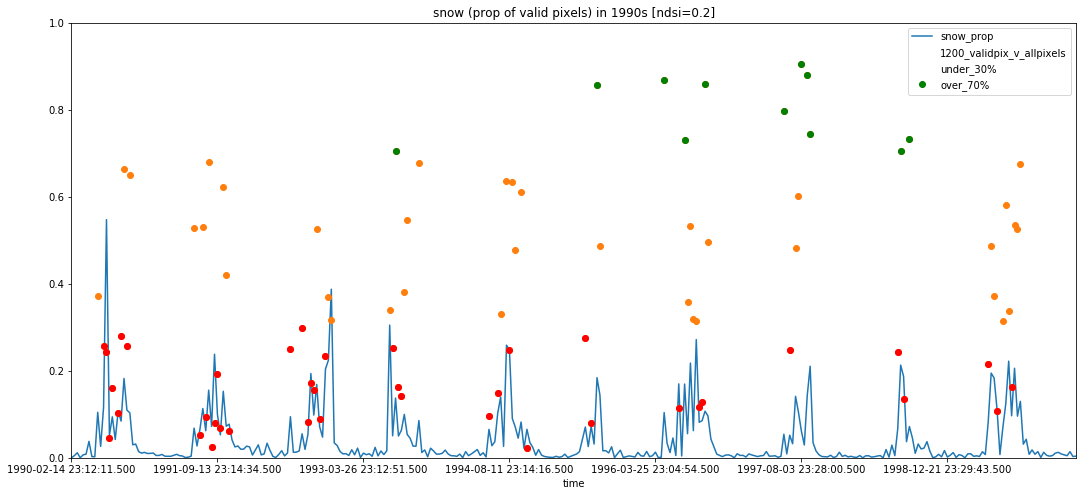

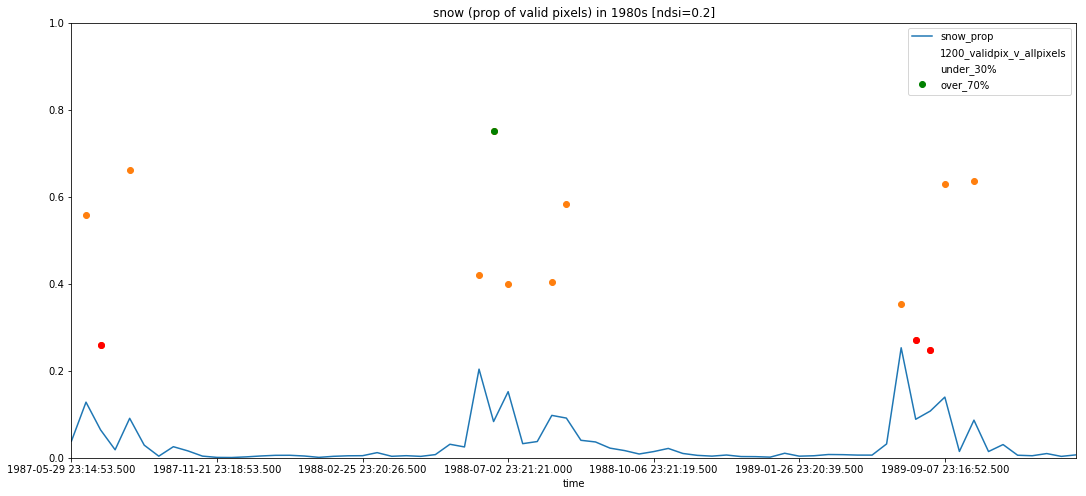

In [46]:
fig, ax = plt.subplots(figsize=(18,8)) 
b = Snow_sum2010_2018.plot(y='snow_prop', ylim=(0,1),ax=ax, title='snow (prop of valid pixels) in 2010s [ndsi=0.2]')
b = Snow_sum2010_2018.plot(y='1200_validpix_v_allpixels',
                           style='o',
                           #kind='bar', color='lightgreen',
                           ax=ax)
b = Snow_sum2010_2018.plot(y='under_30%',
                           style='ro',
                           #kind='bar', color='lightgreen',
                           ax=ax)
b = Snow_sum2010_2018.plot(y='over_70%',
                           style='go',
                           #kind='bar', color='lightgreen',
                           ax=ax)


fig, ax = plt.subplots(figsize=(18,8)) 
b = Snow_sum2000_2009.plot(y='snow_prop', ylim=(0,1),ax=ax, title='snow (prop of valid pixels) in 2000s [ndsi=0.2]')
b = Snow_sum2000_2009.plot(y='1200_validpix_v_allpixels',
                           style='o',
                           #kind='bar', color='lightgreen',
                           ax=ax)
b = Snow_sum2000_2009.plot(y='under_30%',
                           style='ro',
                           #kind='bar', color='lightgreen',
                           ax=ax)
b = Snow_sum2000_2009.plot(y='over_70%',
                           style='go',
                           #kind='bar', color='lightgreen',
                           ax=ax)

fig, ax = plt.subplots(figsize=(18,8)) 
b = Snow_sum1990_1999.plot(y='snow_prop', ylim=(0,1),ax=ax, title='snow (prop of valid pixels) in 1990s [ndsi=0.2]')
b = Snow_sum1990_1999.plot(y='1200_validpix_v_allpixels',
                           style='o',
                           #kind='bar', color='lightgreen',
                           ax=ax)
b = Snow_sum1990_1999.plot(y='under_30%',
                           style='ro',
                           #kind='bar', color='lightgreen',
                           ax=ax)
b = Snow_sum1990_1999.plot(y='over_70%',
                           style='go',
                           #kind='bar', color='lightgreen',
                           ax=ax)

fig, ax = plt.subplots(figsize=(18,8)) 
b = Snow_sum1987_1989.plot(y='snow_prop', ylim=(0,1),ax=ax, title='snow (prop of valid pixels) in 1980s [ndsi=0.2]')
b = Snow_sum1987_1989.plot(y='1200_validpix_v_allpixels',
                           style='o',
                           #kind='bar', color='lightgreen',
                           ax=ax)
b = Snow_sum1987_1989.plot(y='under_30%',
                           style='ro',
                           #kind='bar', color='lightgreen',
                           ax=ax)
b = Snow_sum1987_1989.plot(y='over_70%',
                           style='go',
                           #kind='bar', color='lightgreen',
                           ax=ax)




In [29]:
Snow_sum2010_2018['under_20%'] = np.where(Snow_sum2010_2018['1200_validpix_v_allpixels'] < 0.2, Snow_sum2010_2018['1200_validpix_v_allpixels'], np.nan)
Snow_sum2010_2018['over_80%'] = np.where(Snow_sum2010_2018['1200_validpix_v_allpixels'] > 0.8, Snow_sum2010_2018['1200_validpix_v_allpixels'], np.nan)
    

In [30]:
Snow_sum2010_2018

,snow_prop,pixel_prop,1200_validpix_v_allpixels,under_50%,under_20%,over_80%
time,,,,,,
2010-01-03 23:48:12.500,0.002056,0.687266,NaN,NaN,NaN,NaN
2010-01-11 23:47:39.000,0.002357,0.313637,NaN,NaN,NaN,NaN
2010-01-19 23:48:27.500,0.000790,0.729329,NaN,NaN,NaN,NaN
2010-01-20 23:41:30.500,0.006831,0.920911,NaN,NaN,NaN,NaN
2010-01-27 23:47:43.000,0.001007,0.954815,NaN,NaN,NaN,NaN
2010-01-28 23:42:23.500,0.006171,0.528690,NaN,NaN,NaN,NaN
2010-02-20 23:48:50.500,0.014136,0.263017,NaN,NaN,NaN,NaN
2010-03-01 23:42:44.000,0.001730,0.626093,NaN,NaN,NaN,NaN
2010-03-08 23:48:57.500,0.002932,0.173962,NaN,NaN,NaN,NaN


In [53]:
#Snow_sum2015_2018[:'snow_prop'].astype(str).str[:-12].astype(np.int64)


pandas.core.frame.DataFrame

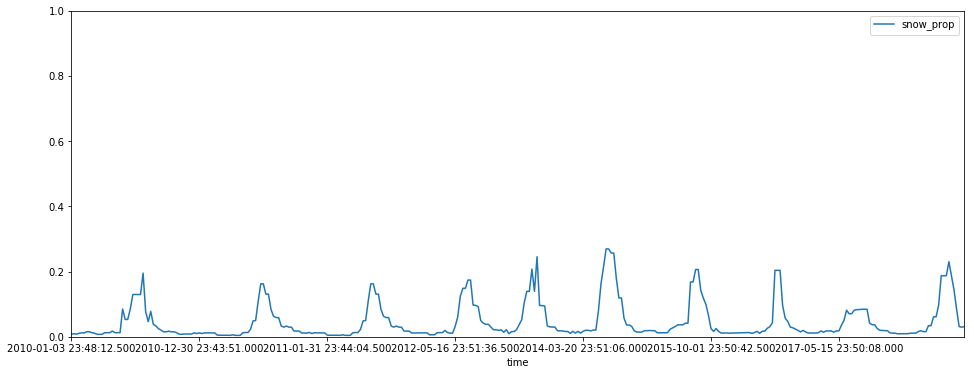

In [12]:
Snow_sum2010_2018.rolling(center=True, min_periods=1, window=5).median().plot(figsize=(16, 6), ylim=(0,1))